## Домашнее задание 3: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

**Пункты 1 и 3 при полном верном решении затем нормируются в 10-балльную шкалу.
Бонус учитывается отдельно.**

### Задание 1:  Визуализация решающих поверхностей в kNN.

Прочтите [статью](https://proglib.io/p/metod-k-blizhayshih-sosedey-k-nearest-neighbour-2021-07-19) про метод ближайших соседей. 

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [11]:
X.isnull().sum()

# нет категориальных признаков

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.


In [14]:
np.random.seed(42)

In [15]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaler = ss.fit(Xtrain)
Xtrain1 = scaler.fit_transform(Xtrain)
Xtest1 = scaler.transform(Xtest)

Xtrain1 = pd.DataFrame(Xtrain1,columns = Xtrain.columns)
Xtest1 = pd.DataFrame(Xtest1,columns = Xtest.columns)
Xtest1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.807426,0.634884,0.714065,-1.239173,0.987958,0.655322,1.015780,-1.540047,0.115685,0.057811,0.002910,1.042568,0.355002
1,1.487547,1.491093,0.270975,-0.172908,0.661273,0.885694,0.638337,-0.509085,-0.592067,0.122063,-0.383663,1.001397,1.129368
2,-0.039741,0.370735,1.231002,0.432270,-0.318781,-1.126223,-1.497197,1.314924,-1.455180,-0.171658,-0.813188,-0.398434,-0.452316
3,0.914814,-0.822492,1.231002,0.864539,0.007904,1.116067,1.234300,-0.588390,1.358567,0.333174,0.990818,0.150519,1.804878
4,-0.707929,-1.123076,-1.649078,0.028818,-1.494846,-0.250808,-0.007289,-0.747000,-0.954575,-0.134943,0.690150,1.207254,-0.748881


In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

predictors = ['alcohol', 'magnesium']
neighbors = [1, 3, 5, 10, 15, 25]
X_train_knn = Xtrain1[['alcohol', 'magnesium']]
X_test_knn = Xtest1[['alcohol', 'magnesium']]

labels = []
classificators = []

for i, n in enumerate(neighbors):
    kNN = KNeighborsClassifier(n_neighbors=n) 
    kNN.fit(X_train_knn, ytrain)
    classificators.append(kNN)
    labels.append(f'n_neighbors={n}')
    train_knn = kNN.predict(X_train_knn)
    test_knn = kNN.predict(X_test_knn)
    ac_tr = accuracy_score(ytrain, train_knn)
    ac_tst = accuracy_score(ytest, test_knn)
    print(f'NN:{n} Train: {ac_tr} Test:{ac_tst}')

NN:1 Train: 0.9919354838709677 Test:0.6666666666666666
NN:3 Train: 0.8387096774193549 Test:0.6481481481481481
NN:5 Train: 0.8064516129032258 Test:0.6851851851851852
NN:10 Train: 0.8064516129032258 Test:0.7037037037037037
NN:15 Train: 0.782258064516129 Test:0.6851851851851852
NN:25 Train: 0.7258064516129032 Test:0.6851851851851852


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [17]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [36]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

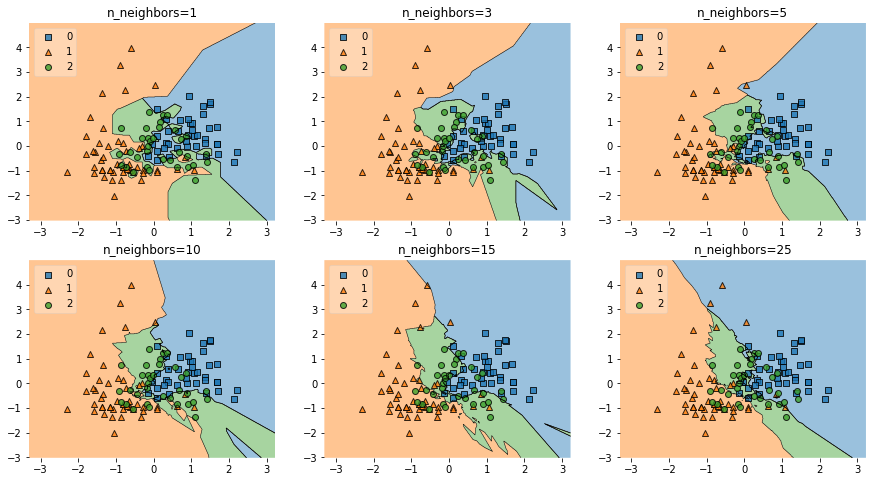

In [69]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15,8))

for clf, lab, grd in zip(classificators, labels, itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_knn.to_numpy(), y=ytrain, clf=clf, legend=2)
    plt.title(lab)

plt.show()

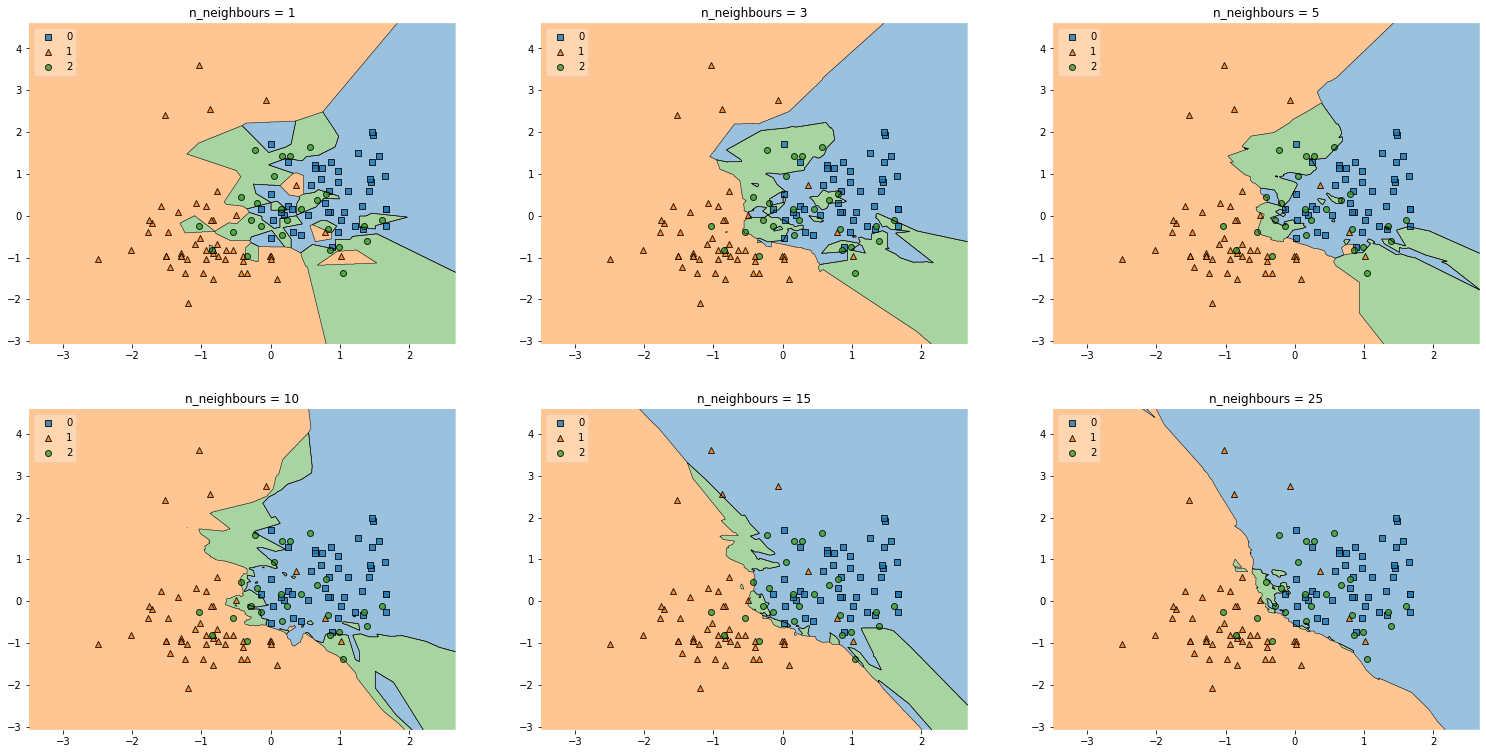

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Для к=5 и к=10 границы являются наиболее сглаженными. Для к=1 и 3 происходит переобучение модели, тк она опирается на слишком малое число соседей

Для к = 15 и 25 зеленая область как класс почти исчезает, тк слишком много объектов принимает участие

Также по таблице в 1.3 видно, что лучшие результаты получаются при к=1 и к=10. Однако если установить к=1, то алгоритм будет просто присваивать любому новому наблюдению метку класса ближайшего объекта. Поэтому на основе графика и предсказанных результатов оптимально использовать значение к=10

### Задание 2** (бонус): Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

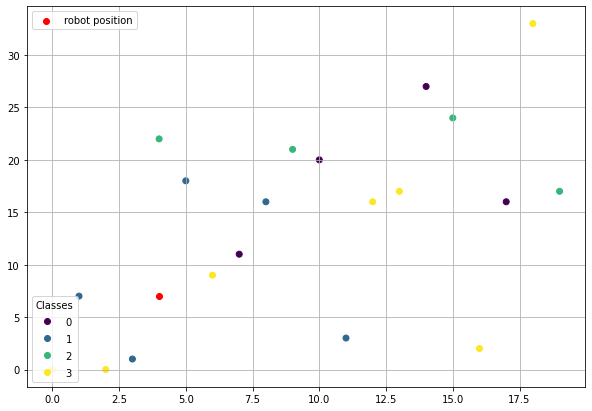

In [277]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [291]:
from sklearn.neighbors import KNeighborsClassifier

In [494]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = []
        self.k = k
        self.landmarks = landmarks
        self.classes = classes
        self.initial_position = initial_position
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        X = self.landmarks
        y = self.classes
        self.knn.fit(X, y)
        if len(self.trajectory) == 0:
            self.trajectory.append(np.reshape(self.initial_position, (-1, 2)))
        current_position = self.trajectory[-1]
        n, p = 1, .2  # number of trials, probability of each trial
        new_class = 2 if np.random.binomial(n,p)==1 else self.knn.predict(current_position)[0]
        current_position = current_position + self.mapping[new_class]
        self.trajectory.append(current_position)


In [472]:
robot = MobileRobot(3, np.array([10, 20]), np.vstack((x, x + np.round(np.random.normal(0, 2, len(x))))).T,
                    np.random.randint(0, 4, size = len(x)))
robot.move()
robot.move()

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [502]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T

    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))

    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)

    for n in range(n_movements):
        robot.move()

    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    traj = np.reshape(robot.trajectory, (-1, 2))
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

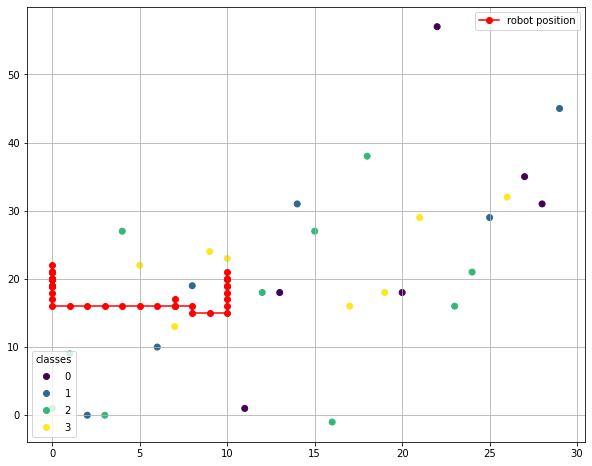

In [503]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

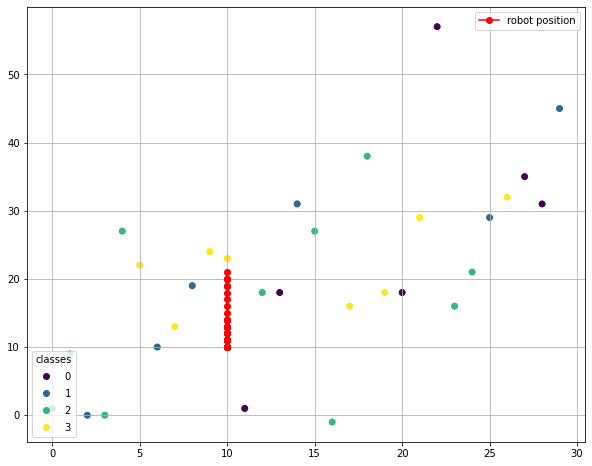

In [504]:
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

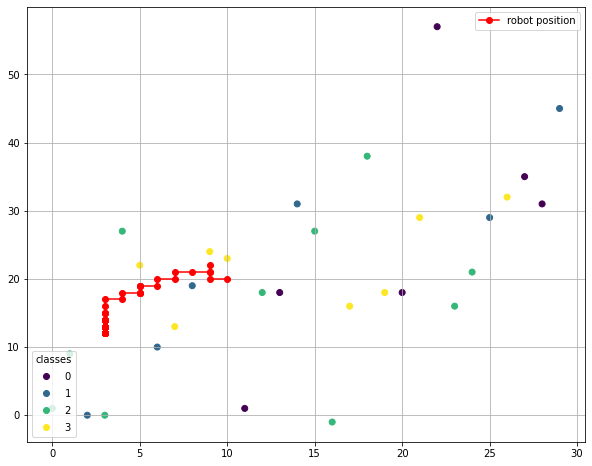

In [505]:
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

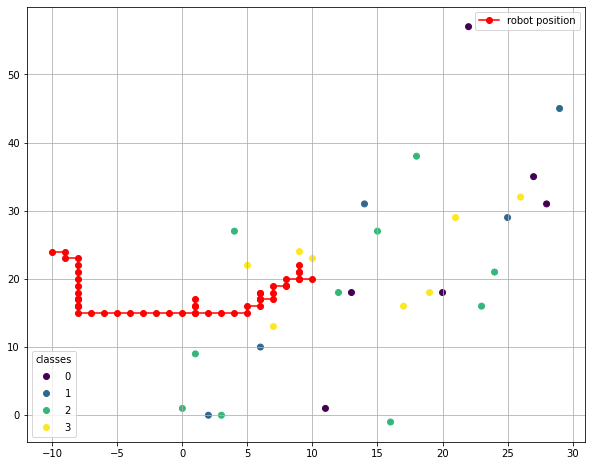

In [506]:
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)

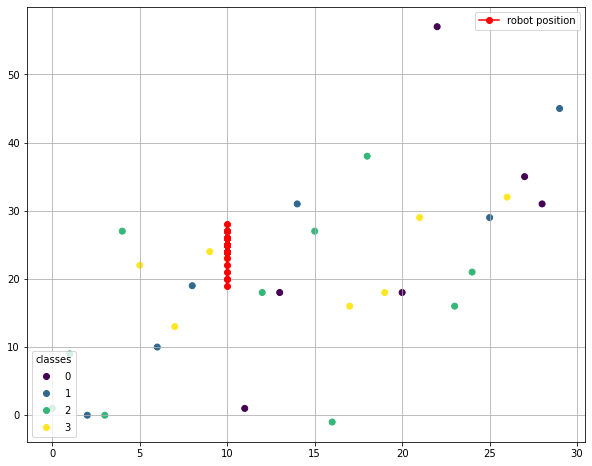

In [507]:
conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50)

В данном эксперименте число соседей очень сильно влияет на траекторию движения работа. Фактически он находится в большинстве рядос с 3 и 1 классом, поэтому движения часто вниз и влево и иногда наверх. Если бы классы назначались осмысленно, то мы бы пытались разделить точки при помощи траектории движения робота и если на каком-то участке преобладали точки одного цвета, то робот долго бы шел по их направлению

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных, содержащих информацию об автомобилях и их стоимости.

In [174]:
data = pd.read_csv('Automobile.csv', na_values=['?', ' ?', '? '])
data.head(100)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,128.0,nissan,gas,std,two,hatchback,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,7799.0
96,1,122.0,nissan,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,7499.0
97,1,103.0,nissan,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,7999.0
98,2,168.0,nissan,gas,std,two,hardtop,fwd,front,95.1,...,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,8249.0


Мы будем решать задачу предсказания стоимости автомобиля `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Обработайте их любым способом.

* если пропусков в столбце мало, можете удалить их
* если пропусков много, лучше заполнить их средним значением или медианой (по столбцу).

In [175]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [151]:
data.shape

(205, 26)

In [179]:
data['normalized-losses'].fillna((data['normalized-losses'].mean()), inplace=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [153]:
data['normalized-losses'] = data['normalized-losses'].apply(lambda x: med if x == '?' else x)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [180]:
data.dropna(inplace=True)

In [182]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [183]:
# прочитав описание на kaggle, делаю вывод, что таких столбцов нет
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

**Задача 3.3 (0.1 балла)** Постройте матрицу корреляций.

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [184]:
data['price'] = data['price'].astype(str).astype(float)
y = data['price']
numericData = data._get_numeric_data()
numericData.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.455135,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835
normalized-losses,0.455135,1.000000,-0.043395,0.033177,0.093666,-0.355796,0.108699,0.142821,-0.025608,0.054589,-0.112980,0.217727,0.213594,-0.208081,-0.166290,0.138700
wheel-base,-0.536516,-0.043395,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,-0.363194,0.033177,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,-0.247741,0.093666,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,-0.517803,-0.355796,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,-0.231086,0.108699,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine-size,-0.068327,0.142821,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,-0.144785,-0.025608,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,-0.010884,0.054589,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007


In [185]:
numericData.corrwith(y)

# width, curb-weight, engine-size коррелируют больше всего с price

symboling           -0.084835
normalized-losses    0.138700
wheel-base           0.584951
length               0.695928
width                0.754649
height               0.136234
curb-weight          0.835368
engine-size          0.888778
bore                 0.546295
stroke               0.096007
compression-ratio    0.074483
horsepower           0.812453
peak-rpm            -0.103835
city-mpg            -0.706618
highway-mpg         -0.719178
price                1.000000
dtype: float64

**Задача 3.4 (0.1 балла)** Закодируйте категориальные признаки.

Можете использовать любые кодировки из библиотеки target_encoders или же OneHotEncoder из sklearn.

In [186]:
data = pd.get_dummies(data, columns=['make', 'fuel-type', 'num-of-cylinders', 'aspiration', 'num-of-doors', 'engine-type', 'body-style', 'drive-wheels', 'engine-location', 'fuel-system' ], drop_first=True)

In [187]:
data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,1,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,1,0,0,0,0,1,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,1,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,1,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                193 non-null    int64  
 1   normalized-losses        193 non-null    float64
 2   wheel-base               193 non-null    float64
 3   length                   193 non-null    float64
 4   width                    193 non-null    float64
 5   height                   193 non-null    float64
 6   curb-weight              193 non-null    int64  
 7   engine-size              193 non-null    int64  
 8   bore                     193 non-null    float64
 9   stroke                   193 non-null    float64
 10  compression-ratio        193 non-null    float64
 11  horsepower               193 non-null    float64
 12  peak-rpm                 193 non-null    float64
 13  city-mpg                 193 non-null    int64  
 14  highway-mpg              1

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [189]:
X = data.drop('price', axis=1)

In [167]:
X.dtypes

symboling              int64
normalized-losses     object
wheel-base           float64
length               float64
width                float64
                      ...   
fuel-system_idi        uint8
fuel-system_mfi        uint8
fuel-system_mpfi       uint8
fuel-system_spdi       uint8
fuel-system_spfi       uint8
Length: 66, dtype: object

In [190]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [192]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaler = ss.fit(Xtrain)
Xtrain1 = scaler.fit_transform(Xtrain)
Xtest1 = scaler.transform(Xtest)

Xtrain1 = pd.DataFrame(Xtrain1,columns = Xtrain.columns)
Xtest1 = pd.DataFrame(Xtest1,columns = Xtest.columns)
Xtest1.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,-1.554989,-0.828651,1.716324,1.181681,1.391553,0.694016,0.886660,0.269023,1.633996,-0.384376,...,-0.392232,-1.206045,1.346291,-0.122628,-0.707107,-0.366679,-0.086387,1.187735,-0.215666,-0.086387
1,-0.708523,-0.603694,-0.247267,-0.160090,-0.214085,-0.551338,-0.694942,-0.500725,1.056914,-1.976693,...,-0.392232,0.829156,-0.742781,-0.122628,1.414214,-0.366679,-0.086387,-0.841939,-0.215666,-0.086387
2,-2.401455,-0.571557,0.924287,1.181681,0.635958,0.984598,0.676762,0.269023,1.633996,-0.384376,...,-0.392232,-1.206045,1.346291,-0.122628,-0.707107,-0.366679,-0.086387,1.187735,-0.215666,-0.086387
3,1.830874,2.352882,-1.220812,-0.263917,0.966531,-1.713668,1.052370,1.202051,0.371630,-0.009713,...,-0.392232,-1.206045,1.346291,-0.122628,-0.707107,-0.366679,-0.086387,1.187735,-0.215666,-0.086387
4,0.137943,1.195961,1.171799,1.493164,2.619393,0.777039,0.509212,0.152395,-0.493993,0.396171,...,-0.392232,0.829156,-0.742781,-0.122628,-0.707107,-0.366679,-0.086387,1.187735,-0.215666,-0.086387


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках, а также r2.

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(Xtrain1, ytrain)

train_pred = lr.predict(Xtrain1)
test_pred = lr.predict(Xtest1)

print("Train MSE: {}".format(np.sqrt(mean_squared_error(ytrain, train_pred))))
print("Test MSE: {}".format(np.sqrt(mean_squared_error(ytest, test_pred))))

print(f'''
train R2={r2_score(ytrain, train_pred)}
''')

print(f'''
test R2={r2_score(ytest, test_pred)}
''')

Train MSE: 1271.096687623167
Test MSE: 2450.0673880088557

train R2=0.9765988077982422


test R2=0.8925111578074196



**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [216]:
cdf = pd.concat([pd.DataFrame(Xtrain1.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
cdf.columns = ['feature', 'value']
cdf.sort_values('value')

# переменные, оценки которых превышают остальные: compression-ratio, num-of-cylinders, fuel-type, 
# horsepower, fuel-system, engine, curb

,feature,value
10,compression-ratio,-3399.054609
37,num-of-cylinders_four,-3377.684402
38,num-of-cylinders_six,-2924.042752
35,fuel-type_gas,-1962.659215
36,num-of-cylinders_five,-1849.040547
48,body-style_hatchback,-1647.440864
49,body-style_sedan,-1500.108086
3,length,-1188.029348
32,make_toyota,-1172.111710
50,body-style_wagon,-1142.990622


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [220]:
from sklearn.linear_model import Lasso

a = 10
lasso = Lasso(alpha=a)
lasso.fit(Xtrain1, ytrain)

y_pred_l_train = lasso.predict(Xtrain1)
y_pred_l_test = lasso.predict(Xtest1)

cdf = pd.concat([pd.DataFrame(Xtrain1.columns),pd.DataFrame(np.transpose(lasso.coef_))], axis = 1)
cdf.columns = ['feature', 'value']
cdf.sort_values('value')
# Некоторые веса сильно уменьшились, например, engine. Также уменьшился num-of-cylinders, но при этом engine, horsepower и curb остались высокими
# compression-ratio и city-mpg занулились

,feature,value
38,num-of-cylinders_six,-1587.627858
48,body-style_hatchback,-1391.275064
49,body-style_sedan,-1159.054070
8,bore,-1133.256277
37,num-of-cylinders_four,-1068.746062
40,num-of-cylinders_twelve,-1044.448278
50,body-style_wagon,-949.709383
1,normalized-losses,-860.467897
5,height,-852.921537
36,num-of-cylinders_five,-835.920182


In [221]:
from sklearn.linear_model import Ridge

a = 10
ridge = Ridge(alpha=a)
ridge.fit(Xtrain1, ytrain)

y_pred_l_train = ridge.predict(Xtrain1)
y_pred_l_test = ridge.predict(Xtest1)

cdf = pd.concat([pd.DataFrame(Xtrain1.columns),pd.DataFrame(np.transpose(ridge.coef_))], axis = 1)
cdf.columns = ['feature', 'value']
cdf.sort_values('value')

# Ridge в данном случае сработал намного лучше. Веса выровнялись. Высокие, но уже значительно ниже остались engine-size, curb-weight,make

,feature,value
37,num-of-cylinders_four,-761.366653
48,body-style_hatchback,-723.526686
1,normalized-losses,-691.703152
32,make_toyota,-642.378966
47,body-style_hardtop,-593.080517
36,num-of-cylinders_five,-573.626720
51,drive-wheels_fwd,-527.804573
50,body-style_wagon,-513.898276
31,make_subaru,-429.909002
25,make_mitsubishi,-422.961183


По коэффициентам линейной регрессии можно заметить, что они имеют большой разброс (большие положительные и большие отрицательные). Это следствие проблемы мультиколлинеарности. По таким коэффициентам сложно говорить о степени важности признака. Небольшие изменения в данных или добавление нового объекта может существенно изменить коэффициены. Решение является неустойчивым. В текущей модели очень много признаков имели большой разброс и значения.

Lasso-регрессия и Ridge-регрессия помогли решить проблему мультиколлинеарности и уменьшили коэффициенты. При этом первая регуляризация производит также отбор признаков, занулив некоторые веса модели, а вторая - использует все веса, но максимально сокращая разброс между ними. 

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

[array([9721, 8422, 7562, 4827, 4263]), array([8872, 7040, 4537, 2781, 2372])]


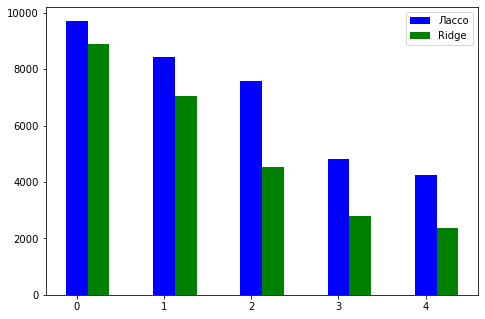

In [265]:
from numpy import linalg
import matplotlib.pyplot as plt

l_coef = []
r_coef = []

for a in [0.1, 1, 10, 100, 200]:
    if a == 0:
        a += 0.00000001
    lasso = Lasso(alpha=a, tol=1e-2)
    ridge = Ridge(alpha=a)
    lasso.fit(Xtrain1, ytrain)
    ridge.fit(Xtrain1, ytrain)
    norm_lasso = linalg.norm(lasso.coef_)
    norm_ridge = linalg.norm(ridge.coef_)
    l_coef.append(round(norm_lasso))
    r_coef.append(round(norm_ridge))

l_coef = np.array(l_coef)
r_coef = np.array(r_coef)
coeffs = [l_coef, r_coef]
print(coeffs)
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, coeffs[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, coeffs[1], color = 'g', width = 0.25)
ax.legend(labels=['Лассо', 'Ridge'])


# Ridge агрессивнее уменьшает веса, а Лассо зануляет некоторые признаки, поэтому его используют для их отбора.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [272]:
from sklearn.linear_model import LassoCV

n_alphas = 500
alphas = np.linspace(1e-10, 5, n_alphas)

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, tol=1e-2)
lasso_cv.fit(Xtrain1, ytrain)
# print(lasso_cv.mse_path_, '\n' )
print(lasso_cv.mse_path_.mean(axis=1), lasso_cv.alpha_, '\n')


/Users/elenaefimova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88198244.1570412, tolerance: 68731902.91296296
  model = cd_fast.enet_coordinate_descent_gram(
/Users/elenaefimova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73903096.09776069, tolerance: 68353090.01212963
  model = cd_fast.enet_coordinate_descent_gram(


[11061339.62632914 11064909.45884996 11071299.74441076 11077364.27990828
 11083730.91967761 11090722.64364654 11098549.16205109 11107193.08378008
 11116492.20112122 11126267.55742597 11136449.89795425 11146916.84683101
 11157636.8210647  11168559.79584967 11179648.49107334 11190926.10541988
 11202378.89708943 11213994.9136941  11225764.6197448  11237679.78831367
 11249732.81843463 11261916.56602117 11274224.31205489 11286649.74480959
 11299186.93587215 11311830.31166514 11324574.62408086 11337414.92250173
 11350346.52826626 11362795.52402202 11375377.38878867 11388386.6540026
 11402374.42532612 11416685.58620856 11433498.0925382  11450213.75617363
 11466841.90600957 11483153.02360732 11496771.70467875 11509279.99206235
 11520688.05411178 11531429.72580885 11541265.13903947 11550456.96466946
 11558946.43420409 11566640.72447897 11572357.76568013 11577862.85350181
 11583170.00311255 11588343.4391569  11593368.92616414 11598288.22341528
 11604053.77326211 11620075.65977798 11635657.038965

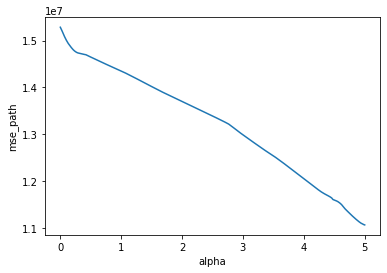

Оптимальное значение альфа 5.0


In [274]:
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis =1))
plt.xlabel('alpha')
plt.ylabel('mse_path')
plt.show()

print(f'Оптимальное значение альфа {lasso_cv.alpha_}')

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [275]:
from sklearn.linear_model import Lasso

a = 5
lasso = Lasso(alpha=a)
lasso.fit(Xtrain1, ytrain)

y_pred_l_train = lasso.predict(Xtrain1)

cdf = pd.concat([pd.DataFrame(Xtrain1.columns),pd.DataFrame(np.transpose(lasso.coef_))], axis = 1)
cdf.columns = ['feature', 'value']
cdf.sort_values('value')

# Видно, что занулился признак compression-ratio и city-mpg, потому что они являются наименее информативными. Возможно, что
# степень сжатия и city-mpg уже содержатся как информация в признаках про количество цилиндров и других. Также занулилась часть engine-type_* и make_*

,feature,value
38,num-of-cylinders_six,-2374.937046
37,num-of-cylinders_four,-2177.308814
48,body-style_hatchback,-1516.087276
49,body-style_sedan,-1335.047633
36,num-of-cylinders_five,-1325.150911
40,num-of-cylinders_twelve,-1229.188448
8,bore,-1069.181750
50,body-style_wagon,-1062.249324
3,length,-998.861235
1,normalized-losses,-895.855914


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [276]:
y_pred_l_test = lasso.predict(Xtest1)

print("Test MSE linear regr: {}".format(np.sqrt(mean_squared_error(ytest, test_pred))))
print("Test MSE Lasso: {}".format(np.sqrt(mean_squared_error(ytest, y_pred_l_test))))
# Ошибка уменьшилась, так как уменьшился разброс весов, а некоторые веса занулились.  
# Лассо является более устойчивой моделью, чем обычная линейная регрессия. Лучше использовать Лассо регрессию

Test MSE linear regr: 2450.0673880088557
Test MSE Lasso: 2432.3599297865185
